# Chronic Kidney Disease Prediction

In [3]:
import sklearn
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import re


df = pd.read_csv('C:\\Users\SHAD\Downloads\processed_kidney_data_set.csv')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# #df=df.replace('[^\d.]','',regex=True).astypey(float)
# v= lambda x:float(x[1:-1])
# df.htn=df.htn.apply(v)

In [5]:
#df.info()

In [6]:
print(df.shape)

(400, 37)


In [7]:
df.isnull().sum()

age            0
scaled_age     0
bp             0
scaled_bp      0
sg             0
al             0
scaled_al      0
su             0
scaled_su      0
rbc            0
scaled_rbc     0
pc             0
pcc            0
ba             0
bgr            0
scaled_bgr     0
bu             0
scaled_bu      0
sc             0
scaled_sc      0
sod            0
scaled_sod     0
pot            0
hemo           0
scaled_hemo    0
pcv            0
scaled_pcv     0
wbc            0
scaled_wbc     0
rbcc           0
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class          0
dtype: int64

In [8]:
df.isin(['	?']).sum() #data which includes the '?' sign

age            0
scaled_age     0
bp             0
scaled_bp      0
sg             0
al             0
scaled_al      0
su             0
scaled_su      0
rbc            0
scaled_rbc     0
pc             0
pcc            0
ba             0
bgr            0
scaled_bgr     0
bu             0
scaled_bu      0
sc             0
scaled_sc      0
sod            0
scaled_sod     0
pot            0
hemo           0
scaled_hemo    0
pcv            0
scaled_pcv     0
wbc            0
scaled_wbc     0
rbcc           0
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class          0
dtype: int64

In [9]:
df.isin(['	?']).sum() #data which includes the '?' sign

age            0
scaled_age     0
bp             0
scaled_bp      0
sg             0
al             0
scaled_al      0
su             0
scaled_su      0
rbc            0
scaled_rbc     0
pc             0
pcc            0
ba             0
bgr            0
scaled_bgr     0
bu             0
scaled_bu      0
sc             0
scaled_sc      0
sod            0
scaled_sod     0
pot            0
hemo           0
scaled_hemo    0
pcv            0
scaled_pcv     0
wbc            0
scaled_wbc     0
rbcc           0
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class          0
dtype: int64

In [10]:
new_df=df.drop(columns=['age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc','class'])



array([[<AxesSubplot:title={'center':'scaled_age'}>,
        <AxesSubplot:title={'center':'scaled_bp'}>,
        <AxesSubplot:title={'center':'scaled_al'}>,
        <AxesSubplot:title={'center':'scaled_su'}>,
        <AxesSubplot:title={'center':'scaled_rbc'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'pcc'}>,
        <AxesSubplot:title={'center':'ba'}>,
        <AxesSubplot:title={'center':'scaled_bgr'}>,
        <AxesSubplot:title={'center':'scaled_bu'}>],
       [<AxesSubplot:title={'center':'scaled_sc'}>,
        <AxesSubplot:title={'center':'scaled_sod'}>,
        <AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'scaled_hemo'}>,
        <AxesSubplot:title={'center':'scaled_pcv'}>],
       [<AxesSubplot:title={'center':'scaled_wbc'}>,
        <AxesSubplot:title={'center':'rbcc'}>,
        <AxesSubplot:title={'center':'htn'}>,
        <AxesSubplot:title={'center':'dm'}>,
        <AxesSubplot:title={'center':'cad'}>]

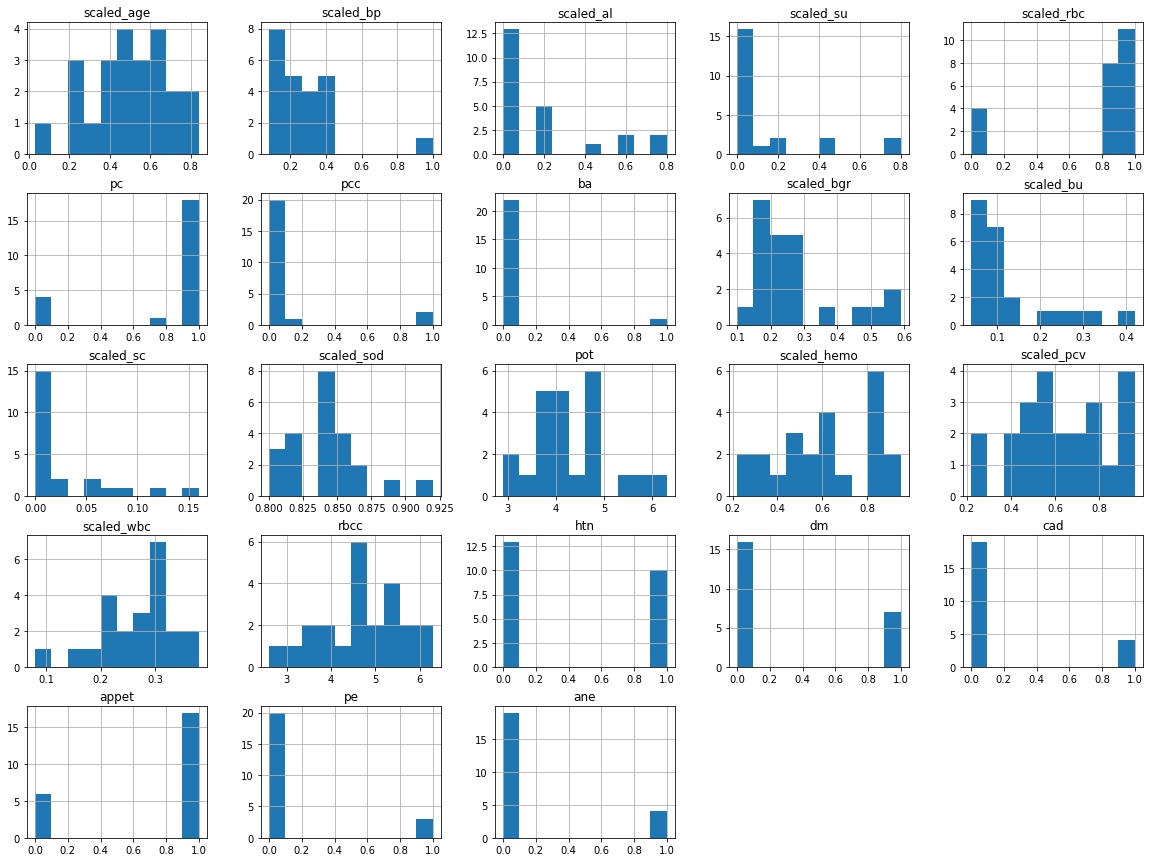

In [11]:
new_df.iloc[1:24].hist(xlabelsize=10,ylabelsize=10,figsize=(20,15)) #Histogram

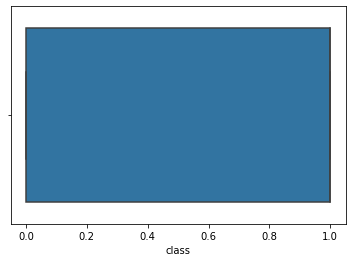

In [12]:
import seaborn as sns
sns.boxplot(df['class'])
plt.show()

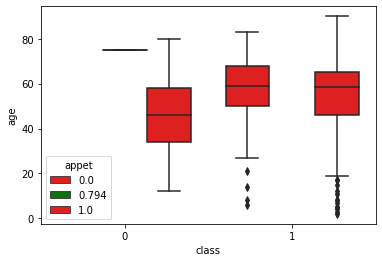

In [120]:
import seaborn as sns

pal = ['red', 'green']
g= sns.boxplot(x="class", y="age", data=df, hue='appet', palette=pal) 

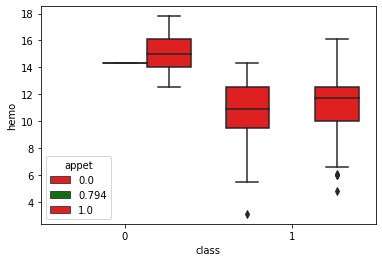

In [122]:

pal = ['red', 'green']
g= sns.boxplot(x="class", y="hemo", data=df, hue='appet', palette=pal) 

In [13]:
df.dtypes

age              int64
scaled_age     float64
bp             float64
scaled_bp      float64
sg             float64
al             float64
scaled_al      float64
su             float64
scaled_su      float64
rbc            float64
scaled_rbc     float64
pc             float64
pcc            float64
ba             float64
bgr            float64
scaled_bgr     float64
bu             float64
scaled_bu      float64
sc             float64
scaled_sc      float64
sod            float64
scaled_sod     float64
pot            float64
hemo           float64
scaled_hemo    float64
pcv            float64
scaled_pcv     float64
wbc            float64
scaled_wbc     float64
rbcc           float64
htn            float64
dm             float64
cad            float64
appet          float64
pe             float64
ane            float64
class            int64
dtype: object

In [14]:
from sklearn.model_selection import train_test_split

y = df['class']

#X = df.drop(columns = 'class')
#X=df.drop(columns=['age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc','class'])
X=df.drop(columns=['scaled_age','scaled_bp','scaled_al','scaled_su','scaled_rbc','scaled_bgr','scaled_bu','scaled_sc','scaled_sod','scaled_hemo','scaled_pcv','scaled_wbc','class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [15]:
X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbc,rbcc,htn,dm,cad,appet,pe,ane
3,52,80.0,1.025,0.000,0.00,1.00,1.000,0.0,0.0,99.000,...,15.000,52.000,6300.000,5.300,0.0,0.0,0.0,1.0,0.0,0.0
18,59,100.0,1.015,4.000,2.00,1.00,1.000,0.0,0.0,255.000,...,7.300,20.000,9800.000,3.900,1.0,1.0,1.0,1.0,0.0,1.0
202,70,70.0,1.010,1.000,0.00,1.00,0.773,1.0,1.0,171.000,...,12.526,38.884,8406.122,4.707,0.0,1.0,0.0,0.0,0.0,0.0
250,34,70.0,1.017,1.017,0.45,0.81,0.773,0.0,0.0,148.037,...,6.000,38.884,8406.122,4.707,1.0,0.0,0.0,1.0,0.0,1.0
274,12,60.0,1.015,3.000,0.00,0.00,0.000,1.0,0.0,148.037,...,12.100,38.884,10300.000,4.707,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,55,90.0,1.017,1.017,0.45,0.81,0.773,0.0,0.0,143.000,...,12.526,38.884,8406.122,4.707,1.0,1.0,0.0,0.0,1.0,0.0
106,61,80.0,1.015,2.000,0.00,0.00,0.000,0.0,0.0,173.000,...,7.700,24.000,9200.000,3.200,1.0,1.0,1.0,0.0,1.0,1.0
270,54,60.0,1.017,3.000,0.45,0.81,0.773,0.0,0.0,125.000,...,15.000,46.000,8406.122,4.707,1.0,1.0,0.0,1.0,1.0,0.0
348,57,80.0,1.025,0.000,0.00,1.00,1.000,0.0,0.0,119.000,...,15.400,42.000,6200.000,6.200,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
X_train.to_csv("XTrain.csv")
X_test.to_csv('XTest.csv')

In [17]:
# x=df.drop('age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc')

In [18]:
X=df.drop(columns=['age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc','class'])

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.2, random_state=42)

In [19]:
X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbc,rbcc,htn,dm,cad,appet,pe,ane
3,52,80.0,1.025,0.000,0.00,1.00,1.000,0.0,0.0,99.000,...,15.000,52.000,6300.000,5.300,0.0,0.0,0.0,1.0,0.0,0.0
18,59,100.0,1.015,4.000,2.00,1.00,1.000,0.0,0.0,255.000,...,7.300,20.000,9800.000,3.900,1.0,1.0,1.0,1.0,0.0,1.0
202,70,70.0,1.010,1.000,0.00,1.00,0.773,1.0,1.0,171.000,...,12.526,38.884,8406.122,4.707,0.0,1.0,0.0,0.0,0.0,0.0
250,34,70.0,1.017,1.017,0.45,0.81,0.773,0.0,0.0,148.037,...,6.000,38.884,8406.122,4.707,1.0,0.0,0.0,1.0,0.0,1.0
274,12,60.0,1.015,3.000,0.00,0.00,0.000,1.0,0.0,148.037,...,12.100,38.884,10300.000,4.707,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,55,90.0,1.017,1.017,0.45,0.81,0.773,0.0,0.0,143.000,...,12.526,38.884,8406.122,4.707,1.0,1.0,0.0,0.0,1.0,0.0
106,61,80.0,1.015,2.000,0.00,0.00,0.000,0.0,0.0,173.000,...,7.700,24.000,9200.000,3.200,1.0,1.0,1.0,0.0,1.0,1.0
270,54,60.0,1.017,3.000,0.45,0.81,0.773,0.0,0.0,125.000,...,15.000,46.000,8406.122,4.707,1.0,1.0,0.0,1.0,1.0,0.0
348,57,80.0,1.025,0.000,0.00,1.00,1.000,0.0,0.0,119.000,...,15.400,42.000,6200.000,6.200,0.0,0.0,0.0,1.0,0.0,0.0


### Decision Tree Classifier

In [20]:
from sklearn import tree

dtree=tree.DecisionTreeClassifier()
dtree=dtree.fit(X_train_scaled,y_train_scaled)
ypred= dtree.score(X_test_scaled,y_test_scaled)

print(ypred)

0.9625


In [21]:
pred_dtree=dtree.predict(X_test_scaled)


#### confusion matrix

In [22]:
print(confusion_matrix(y_test_scaled,pred_dtree))

[[32  1]
 [ 2 45]]


#### Classification report of Decision Tree Classifier

In [23]:
print(classification_report(y_test_scaled,pred_dtree))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.98      0.96      0.97        47

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



[Text(697.5, 770.1, 'X[13] <= 0.675\ngini = 0.464\nsamples = 320\nvalue = [117, 203]'),
 Text(438.4285714285714, 679.5, 'X[14] <= 0.79\ngini = 0.061\nsamples = 192\nvalue = [6, 186]'),
 Text(358.71428571428567, 588.9, 'X[9] <= 0.035\ngini = 0.041\nsamples = 190\nvalue = [4, 186]'),
 Text(159.42857142857142, 498.3, 'X[13] <= 0.615\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(79.71428571428571, 407.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(239.1428571428571, 407.7, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(558.0, 498.3, 'X[14] <= 0.72\ngini = 0.021\nsamples = 186\nvalue = [2, 184]'),
 Text(398.57142857142856, 407.7, 'X[8] <= 0.165\ngini = 0.011\nsamples = 182\nvalue = [1, 181]'),
 Text(318.85714285714283, 317.1, 'X[4] <= 0.905\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(239.1428571428571, 226.5, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(398.57142857142856, 226.5, 'X[2] <= 0.1\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(318.8571428571428

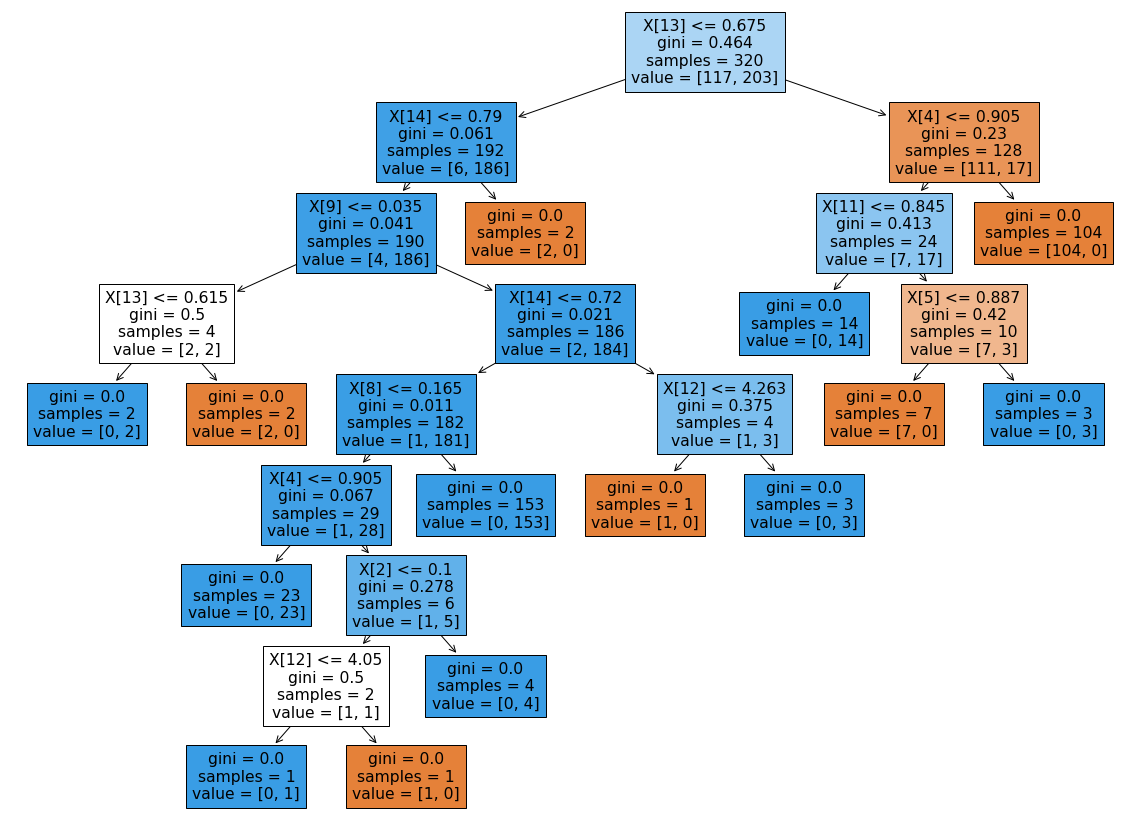

In [24]:
plt.figure(figsize=(20,15))
tree.plot_tree(dtree,filled=True)

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train_scaled)
lr.score(X_test_scaled, y_test_scaled)

0.975

In [26]:
pred_lr=lr.predict(X_test_scaled)

#### confusion matrix

In [27]:
print(confusion_matrix(y_test_scaled,pred_lr))

[[33  0]
 [ 2 45]]


#### Classification report of Logistic Regression

In [28]:
print(classification_report(y_test_scaled,pred_lr))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.96      0.98        47

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



### KNeighborsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier


KnnClassifier = KNeighborsClassifier(n_neighbors=65, metric='euclidean')
KnnClassifier.fit(X_train_scaled,y_train_scaled)
prediction=KnnClassifier.score(X_test_scaled, y_test_scaled)

In [30]:
pred_knn=KnnClassifier.predict(X_test_scaled)

#### confusion matrix

In [31]:
print(confusion_matrix(y_test_scaled,pred_knn))

[[33  0]
 [ 9 38]]


#### Classification report of KNeighborsClassifier

In [32]:
print(classification_report(y_test_scaled,pred_knn))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        33
           1       1.00      0.81      0.89        47

    accuracy                           0.89        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.89      0.89        80



### Support Vector Machine

In [33]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train_scaled)
svm.score(X_test_scaled, y_test_scaled)

0.9375

In [34]:
pred_svm=svm.predict(X_test_scaled)

#### confusion matrix

In [35]:
print(confusion_matrix(y_test_scaled,pred_svm))

[[33  0]
 [ 5 42]]


#### Classification report of svm

In [36]:
print(classification_report(y_test_scaled,pred_svm))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.89      0.94        47

    accuracy                           0.94        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



### RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train_scaled, y_train_scaled)
rf.score(X_test_scaled, y_test_scaled)


1.0

In [38]:
pred_rf=rf.predict(X_test_scaled)

#### confusion matrix

In [39]:
print(confusion_matrix(y_test_scaled,pred_rf))

[[33  0]
 [ 0 47]]


#### Classification report of RandomForestClassifier

In [40]:
print(classification_report(y_test_scaled,pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        47

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# Using K-Fold


In [41]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [42]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]):
    print(train_index, test_index)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [0 1 2]
[ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [3 4 5]
[ 0  1  2  3  4  5  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [6 7 8]
[ 0  1  2  3  4  5  6  7  8 12 13 14 15 16 17 18 19 20 21 22 23] [ 9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 23] [12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17 18 19 20 21 22 23] [14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 20 21 22 23] [16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 20 21 22 23] [18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23] [20 21]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [22 23]


In [43]:
def get_score(model, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [44]:
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
folds = StratifiedKFold(n_splits = 10)

def models(X_train_scaled, y_train_scaled,scoring, cv):

    scoresLR = cross_val_score(LogisticRegression(), X_train_scaled, y_train_scaled, scoring = scoring, cv = cv, n_jobs = 1)
    print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))
    
    scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), X_train_scaled, y_train_scaled, scoring = scoring, cv = cv, n_jobs = 1)
    print('Accuracy for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

    scoresSV = cross_val_score(SVC(), X_train_scaled, y_train_scaled, scoring = scoring, cv = cv, n_jobs = 1)
    print('Accuracy for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

    scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), X_train_scaled, y_train_scaled, scoring = scoring, cv = cv, n_jobs = 1)
    print('Accuracy for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))

    scoresDtree= cross_val_score(DecisionTreeClassifier(max_depth= 10, criterion='gini'), X_train_scaled, y_train_scaled, scoring = scoring, cv = cv, n_jobs = 1)
    print('Accuracy for Decision Tree Model: %.3f (%.3f)' % (mean(scoresDtree), std(scoresDtree)))
    

In [45]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.2, random_state=42)

In [46]:
cv= StratifiedKFold(n_splits=10, random_state=1, shuffle = True)

print ('Accuracy: \n')
models(X_train_scaled, y_train_scaled, 'accuracy', cv)

print ('Precision: \n')
models(X_train_scaled, y_train_scaled, 'precision', cv)

print ('Recall: \n')
models(X_train_scaled, y_train_scaled, 'recall', cv)

print ('F-measure: \n')
models(X_train_scaled, y_train_scaled, 'f1', cv)

print ('ROC: \n')
models(X_train_scaled, y_train_scaled, 'roc_auc', cv)


Accuracy: 

Accuracy for Logistic Regression Model: 0.981 (0.025)
Accuracy for Random Forest Model: 0.988 (0.021)
Accuracy for SVM Model: 0.934 (0.033)
Accuracy for KNN Model: 0.941 (0.041)
Accuracy for Decision Tree Model: 0.953 (0.029)
Precision: 

Accuracy for Logistic Regression Model: 1.000 (0.000)
Accuracy for Random Forest Model: 0.991 (0.019)
Accuracy for SVM Model: 1.000 (0.000)
Accuracy for KNN Model: 1.000 (0.000)
Accuracy for Decision Tree Model: 0.964 (0.039)
Recall: 

Accuracy for Logistic Regression Model: 0.970 (0.040)
Accuracy for Random Forest Model: 0.985 (0.023)
Accuracy for SVM Model: 0.896 (0.053)
Accuracy for KNN Model: 0.905 (0.065)
Accuracy for Decision Tree Model: 0.965 (0.045)
F-measure: 

Accuracy for Logistic Regression Model: 0.984 (0.021)
Accuracy for Random Forest Model: 0.995 (0.010)
Accuracy for SVM Model: 0.944 (0.030)
Accuracy for KNN Model: 0.949 (0.036)
Accuracy for Decision Tree Model: 0.952 (0.032)
ROC: 

Accuracy for Logistic Regression Model: 0

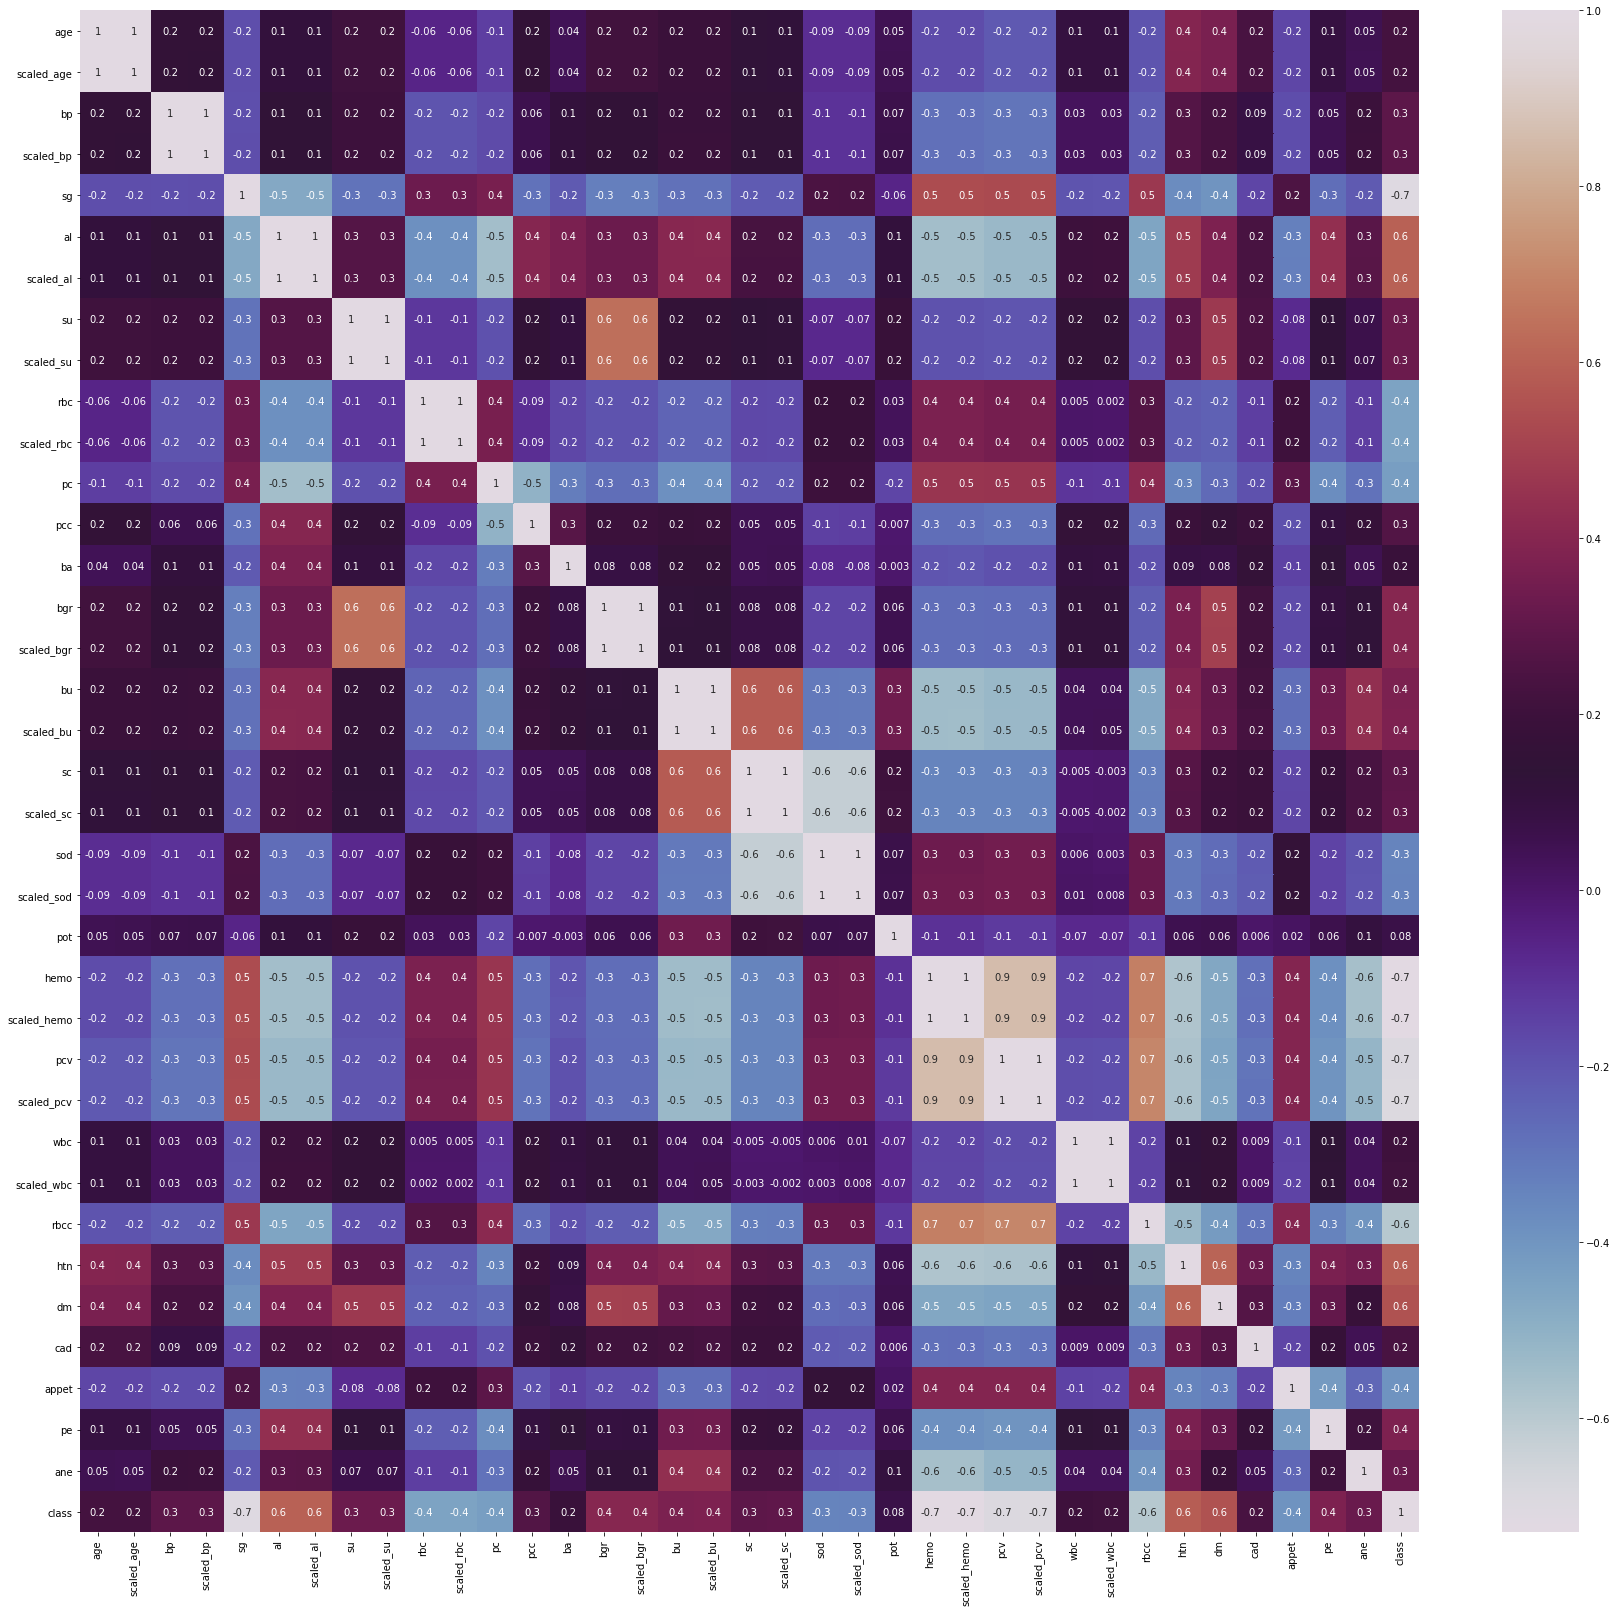

In [116]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,28))
sns.heatmap(df.corr(), cmap = 'twilight', annot = True, fmt='.1g')
plt.show()

# KFOLD and ROC CURVE


# KNN


In [48]:

accuracy_rate=[]
for i in range(1,5):    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y, cv=10)
    accuracy_rate.append(score.mean())

In [49]:
error_rate = []


for i in range(1,5):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

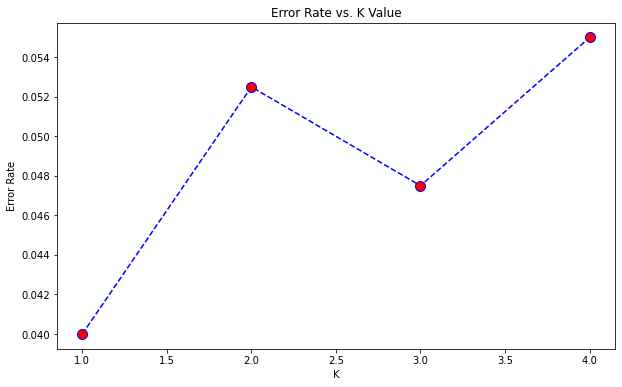

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

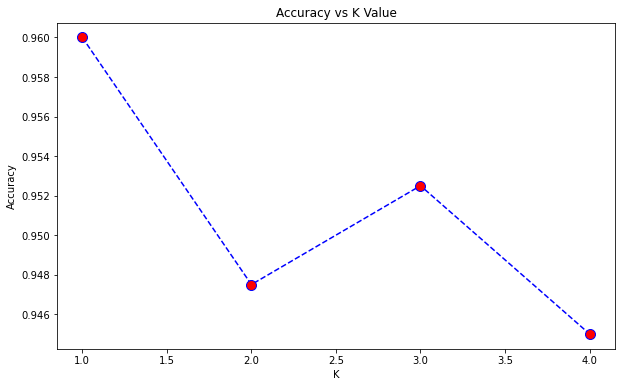

In [51]:
plt.figure(figsize = (10,6))
plt.plot(range(1,5),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [52]:
knn = KNeighborsClassifier(n_neighbors=17,metric="euclidean")
knn.fit(X,y)
pred = knn.predict(X)

In [53]:
print(classification_report(y,pred))
print(confusion_matrix(y,pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       150
           1       1.00      0.90      0.95       250

    accuracy                           0.94       400
   macro avg       0.93      0.95      0.93       400
weighted avg       0.94      0.94      0.94       400

[[149   1]
 [ 25 225]]


In [54]:
y_pred_prob = knn.predict_proba(X)[:,1]
print(roc_auc_score(y,y_pred_prob))


0.9947733333333333


# Decision Tree

In [55]:
accuracy_rate=[]
for i in range(1,30):    
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    score=cross_val_score(dt,X,y, cv=10)
    accuracy_rate.append(score.mean())

In [56]:
error_rate = []

for i in range(1,30):
    
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    score=cross_val_score(dt,X,y, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

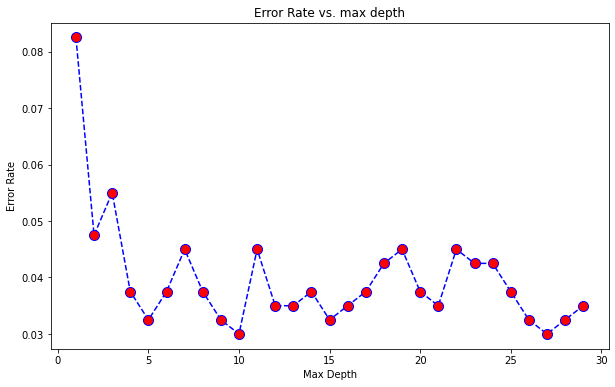

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max depth')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

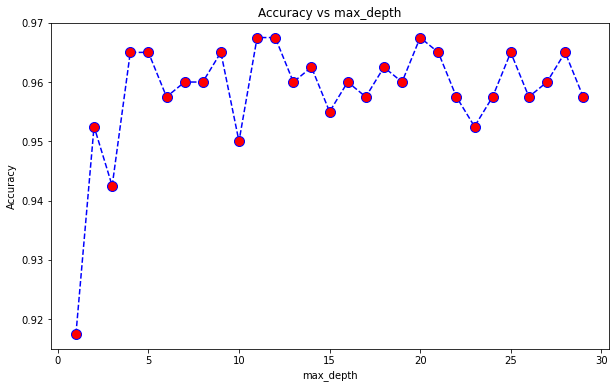

In [58]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [59]:
dt = DecisionTreeClassifier(max_depth=3,criterion = "gini")
dt.fit(X,y)
pred = dt.predict(X)

In [60]:
print(classification_report(y,pred))
print(confusion_matrix(y,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.98      0.98      0.98       250

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

[[146   4]
 [  4 246]]


In [61]:
y_pred_prob = dt.predict_proba(X)[:,1]
print(roc_auc_score(y,y_pred_prob))

0.9928533333333334


#  Logistic Regression Model


In [62]:
accuracy_rate=[]
for i in range(1,30):    
    dt = LogisticRegression(C= i, solver='liblinear', random_state=0)
    score=cross_val_score(dt,X_train,y_train, cv=10)
    accuracy_rate.append(score.mean())
    
    scoresLR = cross_val_score(LogisticRegression(), X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))

Accuracy for Logistic Regression Model: 0.975 (0.016)


In [63]:
error_rate = []

for i in range(1,30):
    
    dt = LogisticRegression(C= i, solver='liblinear', random_state=0)
    score=cross_val_score(dt,X_train,y_train, cv=10)
    error_rate.append(1-score.mean())

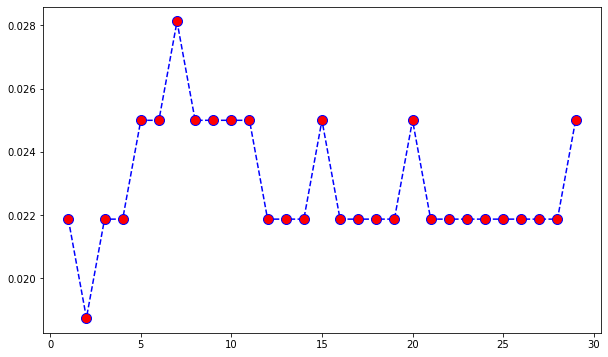

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)


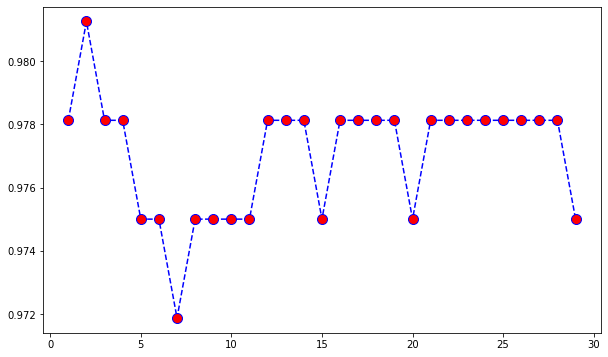

In [65]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)


In [66]:
dt = LogisticRegression(solver='liblinear', random_state=0)
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

In [67]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.96      0.98        47

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

[[33  0]
 [ 2 45]]


In [68]:
y_pred_prob = dt.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))

0.9825918762088975


# Feature Selection using RFE

In [69]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel = 'linear')
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)

In [70]:
print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)

Num Features: 8
Selected Features: [False  True  True False  True False False False False  True  True False
 False  True  True False False False  True False False False False]
Feature Ranking: [ 9  1  1  8  1 15 16 13  2  1  1  5 14  1  1  3 10  4  1  7 11 12  6]


In [71]:
X.head()

,scaled_age,scaled_bp,scaled_al,scaled_su,scaled_rbc,pc,pcc,ba,scaled_bgr,scaled_bu,...,scaled_hemo,scaled_pcv,scaled_wbc,rbcc,htn,dm,cad,appet,pe,ane
0,0.66,0.08,0.0,0.0,1.00,1.0,0.0,0.0,0.24,0.11,...,0.76,0.87,0.35,5.600,0.0,0.0,0.0,1.0,0.0,0.0
1,0.36,0.31,0.4,0.0,1.00,1.0,0.0,0.0,0.18,0.12,...,0.60,0.67,0.26,4.707,0.0,0.0,0.0,1.0,0.0,0.0
2,0.69,0.31,0.0,0.0,0.81,1.0,0.0,0.0,0.22,0.04,...,0.59,0.56,0.38,4.700,0.0,0.0,0.0,1.0,0.0,0.0
3,0.57,0.23,0.0,0.0,1.00,1.0,0.0,0.0,0.16,0.06,...,0.81,0.96,0.17,5.300,0.0,0.0,0.0,1.0,0.0,0.0
4,0.52,0.23,0.2,0.0,0.81,1.0,0.0,0.0,0.21,0.09,...,0.84,0.78,0.23,5.200,1.0,1.0,0.0,1.0,0.0,0.0


In [72]:
df_rfe= new_df.iloc[:, [1,2,4,9, 10,13,14,15]]

df_rfe.head()

,scaled_bp,scaled_al,scaled_rbc,scaled_bu,scaled_sc,scaled_hemo,scaled_pcv,scaled_wbc
0,0.08,0.0,1.00,0.11,0.00,0.76,0.87,0.35
1,0.31,0.4,1.00,0.12,0.02,0.60,0.67,0.26
2,0.31,0.0,0.81,0.04,0.02,0.59,0.56,0.38
3,0.23,0.0,1.00,0.06,0.01,0.81,0.96,0.17
4,0.23,0.2,0.81,0.09,0.01,0.84,0.78,0.23


In [73]:
X_rfe = df_rfe
y_rfe = df['class']

folds = StratifiedKFold(n_splits = 3)
cv = StratifiedKFold(n_splits = 3, random_state = 1, shuffle = True)
scoresLR = cross_val_score(LogisticRegression(), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))

scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

scoresSV = cross_val_score(SVC(), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))


Accuracy for Logistic Regression Model: 0.983 (0.013)
Accuracy for Random Forest Model: 0.988 (0.009)
Accuracy for SVM Model: 0.985 (0.006)
Accuracy for KNN Model: 0.988 (0.009)


# ROC Score

Logistic: ROC AUC=0.996
dtree: ROC AUC=0.964
knn: ROC AUC=0.994
rf: ROC AUC=1.000
svm: ROC AUC=0.996


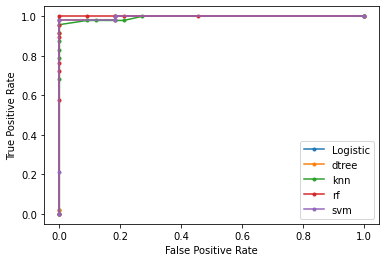

In [74]:
lr_probs=lr.predict_proba(X_test_scaled)
lr_probs=lr_probs[:,1]
lr_auc = roc_auc_score(y_test_scaled, lr_probs)

print('Logistic: ROC AUC=%.3f' % (lr_auc))

lr_fpr, lr_tpr, _ = roc_curve(y_test_scaled, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')






dtree_probs=dtree.predict_proba(X_test_scaled)
dtree_probs=dtree_probs[:,1]
dtree_auc = roc_auc_score(y_test_scaled, dtree_probs)

print('dtree: ROC AUC=%.3f' % (dtree_auc))

dtree_fpr, dtree_tpr, _ =  roc_curve(y_test_scaled, lr_probs)

plt.plot(dtree_fpr, dtree_tpr, marker='.', label='dtree')



knn_probs=knn.predict_proba(X_test_scaled)
knn_probs=knn_probs[:,1]
knn_auc = roc_auc_score(y_test_scaled, knn_probs)

print('knn: ROC AUC=%.3f' % (knn_auc))

knn_fpr, knn_tpr, _ = roc_curve(y_test_scaled, knn_probs)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn')




rf_probs=rf.predict_proba(X_test_scaled)
rf_probs=rf_probs[:,1]
rf_auc = roc_auc_score(y_test_scaled, rf_probs)

print('rf: ROC AUC=%.3f' % (rf_auc))

rf_fpr, rf_tpr, _ = roc_curve(y_test_scaled, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='rf')







svm_probs=svm.predict_proba(X_test_scaled)
svm_probs=svm_probs[:,1]
svm_auc = roc_auc_score(y_test_scaled, svm_probs)



print('svm: ROC AUC=%.3f' % (svm_auc))

svm_fpr, svm_tpr, _ = roc_curve(y_test_scaled, svm_probs)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm')





# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Feature Selection using kbest

In [90]:
from sklearn.feature_selection import SelectKBest

In [91]:
from sklearn.feature_selection import f_classif

In [92]:
FitFeatures = SelectKBest(score_func=f_classif)

In [93]:
FitFeatures.fit(X,y)

SelectKBest()

In [108]:
X_Col= pd.DataFrame(FitFeatures.scores_, columns=['Score_Val'])

In [109]:
X_Col

,Score_Val
0,21.040938
1,36.481331
2,222.004808
3,47.915659
4,99.683904
5,90.809601
6,29.094993
7,13.908227
8,76.201572
9,64.957995


In [110]:
Name_col = pd.DataFrame(X.columns)

In [112]:
top_features = pd.concat([Name_col, X_Col], axis=1)

In [113]:
top_features

,0,Score_Val
0,scaled_age,21.040938
1,scaled_bp,36.481331
2,scaled_al,222.004808
3,scaled_su,47.915659
4,scaled_rbc,99.683904
5,pc,90.809601
6,pcc,29.094993
7,ba,13.908227
8,scaled_bgr,76.201572
9,scaled_bu,64.957995


In [115]:
top_features.nlargest(10, X_Col)

,0,Score_Val
13,scaled_hemo,453.367717
14,scaled_pcv,367.436565
2,scaled_al,222.004808
16,rbcc,213.660166
17,htn,208.532433
18,dm,177.264298
4,scaled_rbc,99.683904
5,pc,90.809601
8,scaled_bgr,76.201572
20,appet,72.184243


# Feature Importance

In [75]:
from sklearn.ensemble import ExtraTreesClassifier

In [77]:
model = ExtraTreesClassifier()

In [78]:
model.fit(X,y)

ExtraTreesClassifier()

In [79]:
model.feature_importances_

array([0.00420769, 0.01441224, 0.11011039, 0.01423521, 0.14666258,
       0.06386585, 0.00313134, 0.00225521, 0.02433396, 0.01074333,
       0.02151833, 0.01298552, 0.00510683, 0.09478395, 0.08896669,
       0.00557185, 0.04273564, 0.11476131, 0.11943384, 0.00290699,
       0.04756003, 0.02788733, 0.02182389])

In [81]:
top = pd.Series(model.feature_importances_, index= X.columns)

In [82]:
top

scaled_age     0.004208
scaled_bp      0.014412
scaled_al      0.110110
scaled_su      0.014235
scaled_rbc     0.146663
pc             0.063866
pcc            0.003131
ba             0.002255
scaled_bgr     0.024334
scaled_bu      0.010743
scaled_sc      0.021518
scaled_sod     0.012986
pot            0.005107
scaled_hemo    0.094784
scaled_pcv     0.088967
scaled_wbc     0.005572
rbcc           0.042736
htn            0.114761
dm             0.119434
cad            0.002907
appet          0.047560
pe             0.027887
ane            0.021824
dtype: float64

<AxesSubplot:>

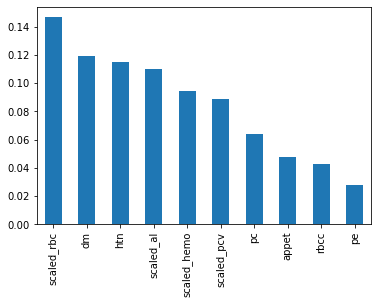

In [84]:
top.nlargest(10).plot(kind='bar')

<AxesSubplot:>

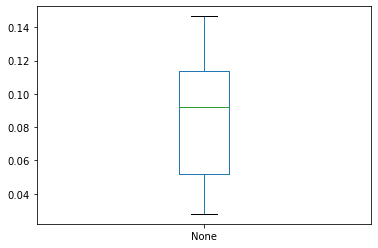

In [85]:
top.nlargest(10).plot(kind='box')

<AxesSubplot:>

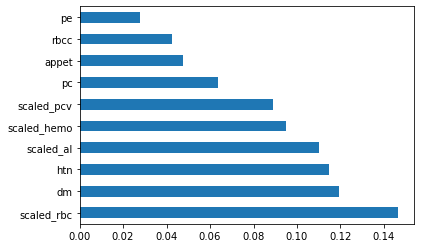

In [86]:
top.nlargest(10).plot(kind='barh')